In [1]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movie_file= Path("IMDb_All_Genres.csv")

movie_file_df = Path('../jeff_analysis/final_df.csv')
movie_clean = pd.read_csv(movie_file_df)

movie_df= pd.read_csv(movie_file)

movie_clean.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [38]:
movie_df = movie_df.rename(columns={ 'main_genre' : 'genre', 'Runtime(Mins)': 'runtime'})
movie_df.head()

,Movie_Title,Year,Director,Actors,Rating,runtime,Censor,Total_Gross,genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


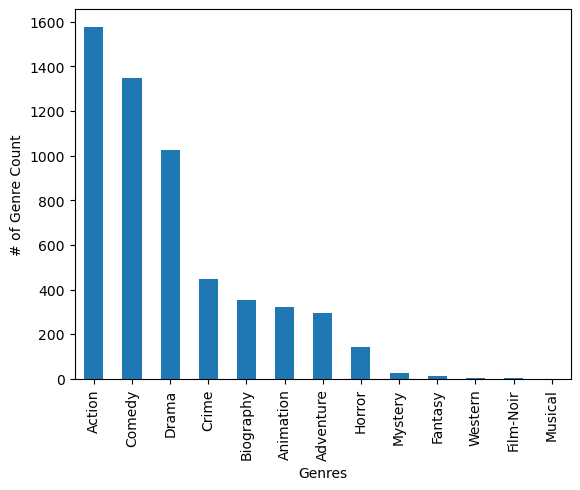

In [43]:
#genre counts using original df
genre_count = movie_df['genre'].value_counts()
genre_count.plot(kind = 'bar', xlabel = 'Genres', ylabel= '# of Genre Count')
plt.show()

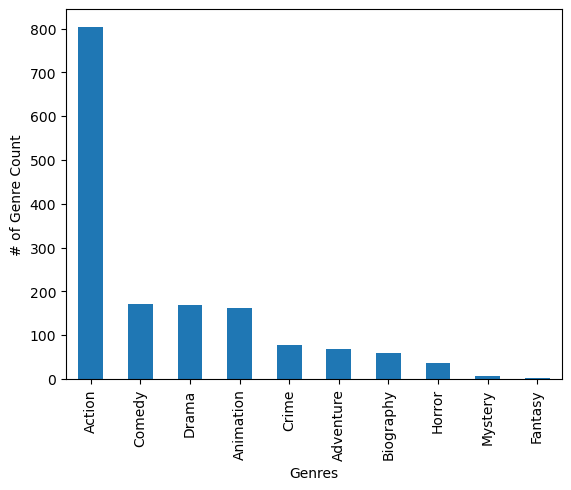

In [4]:
#Simple bar graph of genre counts
genre_count = movie_clean['main_genre_movie'].value_counts()
genre_count.plot(kind = 'bar', xlabel = 'Genres', ylabel= '# of Genre Count')
plt.show()

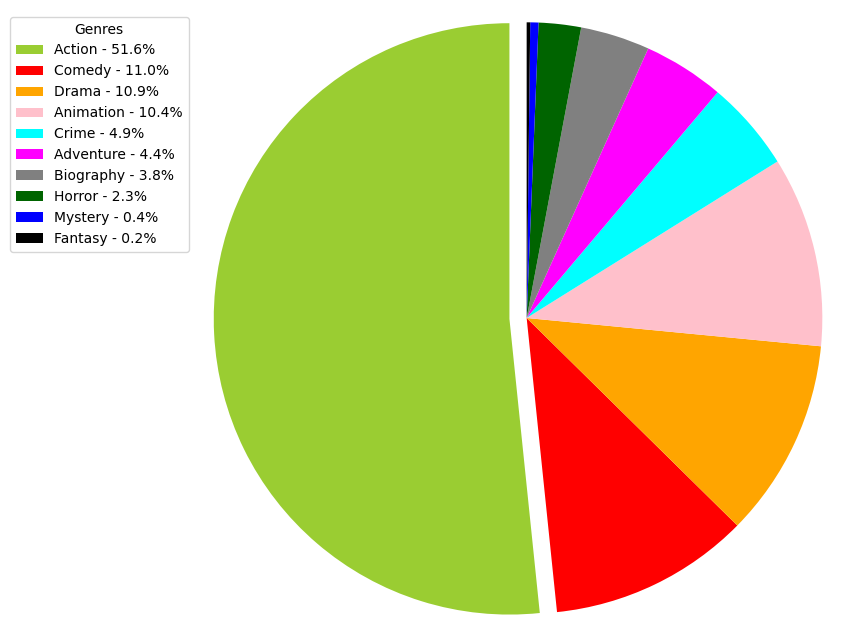

In [5]:
#Pie Chart of Genre Movie Counts using cleaned df
explode = (0.07,0,0,0,0,0,0,0,0,0)
labels = ['Action', 'Comedy', 'Drama', 'Animation', 'Crime', 'Adventure', 'Biography', 'Horror', 'Mystery', 'Fantasy']
colors = ['yellowgreen','red', 'orange','pink', 'cyan','magenta','grey', 'darkgreen', 'blue','black']


genre_count = movie_clean['main_genre_movie'].value_counts()

fig1, ax1 = plt.subplots(figsize=(15, 8))
wedges, texts = plt.pie(genre_count, colors=colors, explode=explode, startangle=90, radius=1.2)
plt.legend(wedges, [f'{label} - {count/sum(genre_count)*100:.1f}%' for label, count in zip(labels, genre_count)], title="Genres", loc="upper left",bbox_to_anchor = (-.35,1))
plt.show()


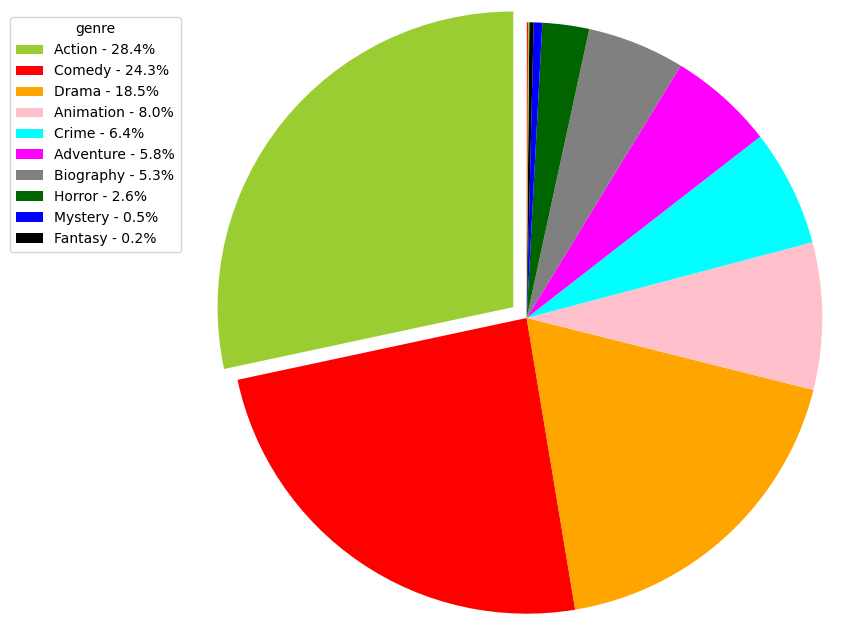

In [44]:
#pie using original 5000 df
genre_count = movie_df['genre'].value_counts()
explode = (0.07,0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(15, 8))
wedges, texts = plt.pie(genre_count, colors=colors, explode=explode, startangle=90, radius=1.2)
plt.legend(wedges, [f'{label} - {count/sum(genre_count)*100:.1f}%' for label, count in zip(labels, genre_count)], title="genre", loc="upper left",bbox_to_anchor = (-.35,1))
plt.show()

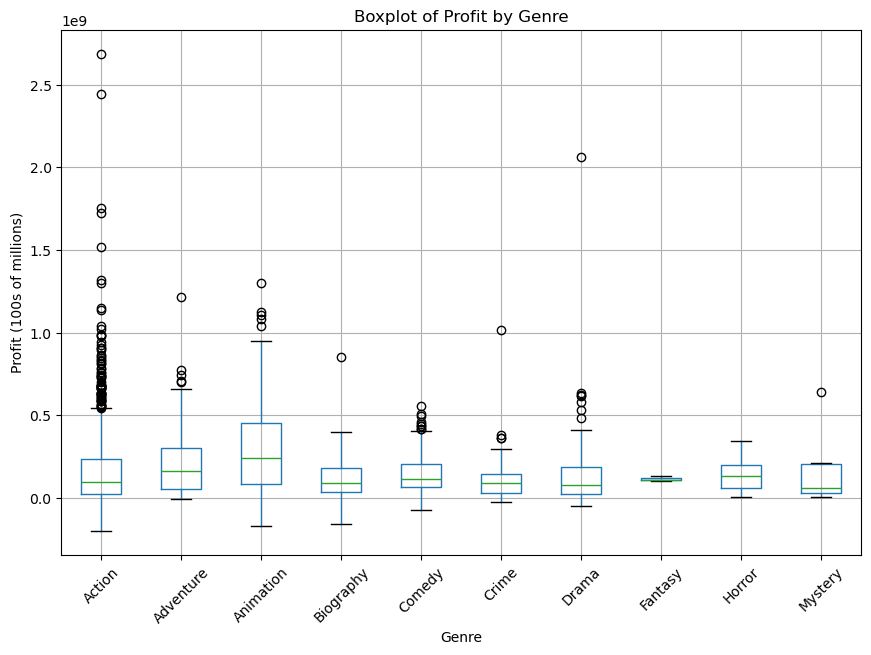

In [55]:
plot = movie_clean.boxplot(by='main_genre_movie', column='profit', figsize=(10, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Profit (100s of millions)')
plt.title('Boxplot of Profit by Genre')
#ax = plot.add_axes([0, 0, 1, 1])

plt.xticks(rotation=45)
#plt.grid(False)
plot = plt.show()

In [ ]:
#graph of genre and awards won

In [ ]:
#directors and genre movies made


Text(0, 0.5, 'Runtime (mins)')

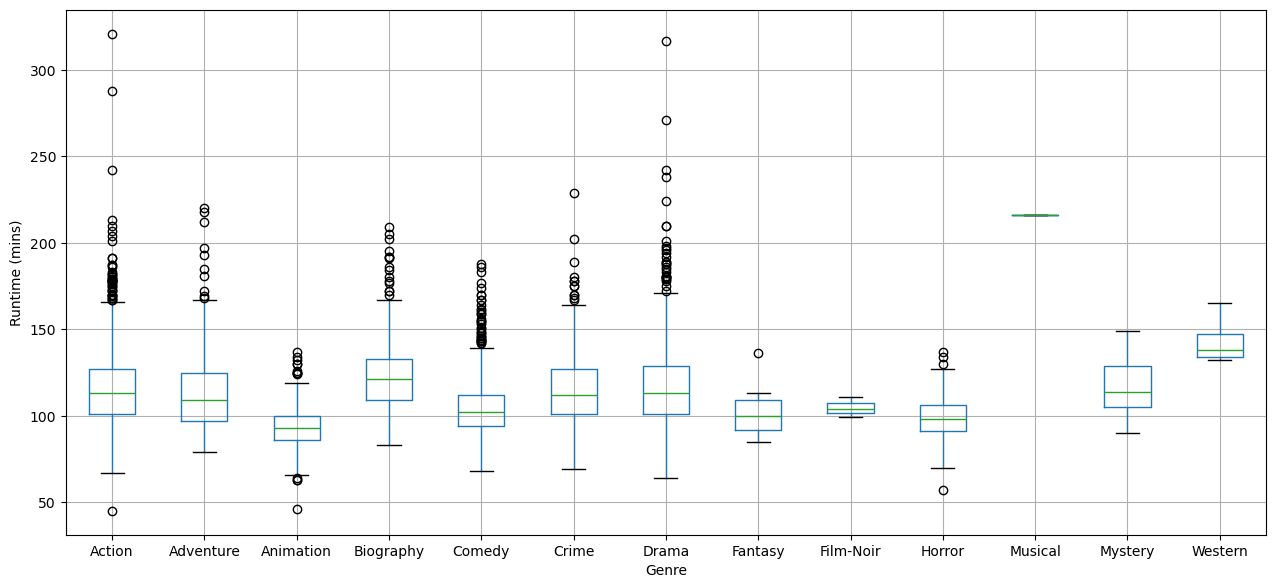

In [46]:
#boxplot of genre and runtime using original df
plot = movie_df.boxplot(by='genre', column='runtime', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Runtime (mins)')
#plt.title('Boxplot of Profit by Genre')

Text(0, 0.5, 'Rating (IMDB)')

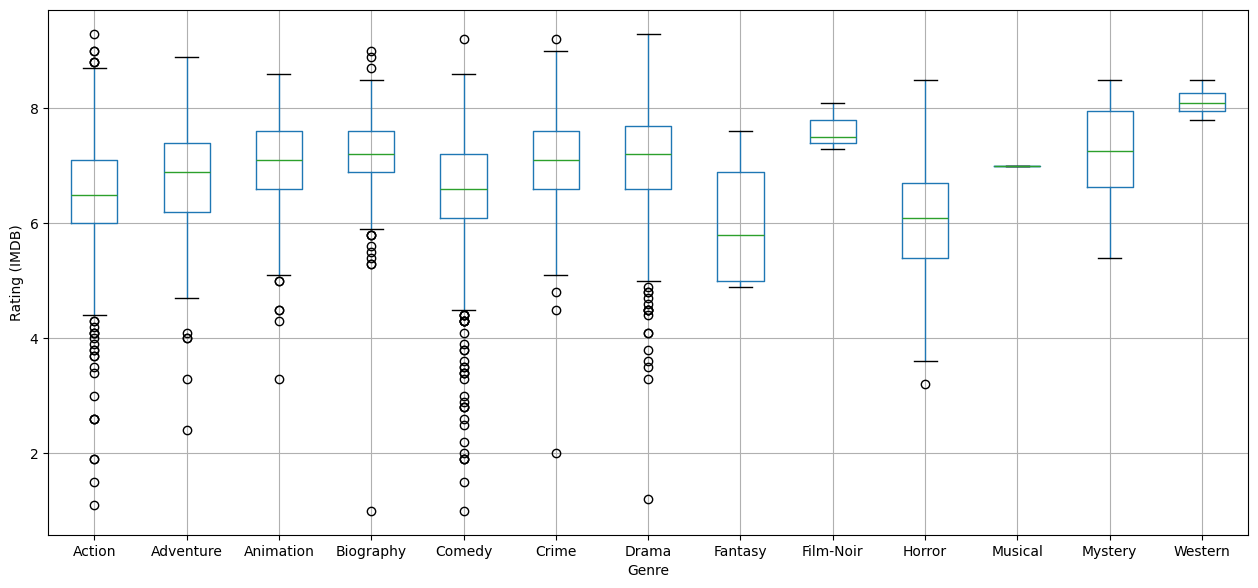

In [58]:
# Box plot of IMDB ratings using original DF
plot = movie_df.boxplot(by='genre', column='Rating', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Rating (IMDB)')

Text(0, 0.5, 'Budget')

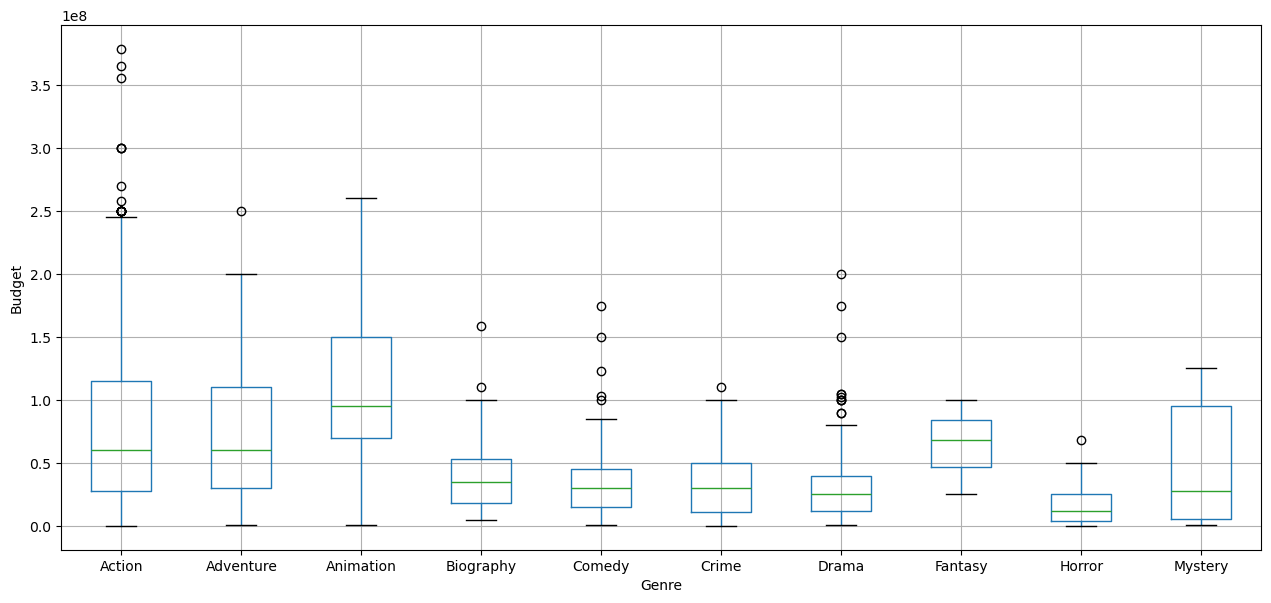

In [60]:
plot = movie_clean.boxplot(by='main_genre_movie', column='budget', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Budget')

In [ ]:
plot = movie_clean.boxplot(by='main_genre_movie', column='Metascore', figsize=(15, 7))
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.xlabel('Genre')
plt.ylabel('Metascore')